# Project 6 Linear Regression
Jensen Judkins, Samuel McMillan

In [5]:
#Imports
import pandas as pd
import numpy as np

In [6]:
#Read in the data
df = pd.read_csv("RRCA_baseflow.csv")


Below sets the date according to the offset given in the assignment description. Adds columns for year, month, day, and date which is the full date in the format of year-month-day.

In [7]:
#create another column named "Baseflow" which is just a copy of "Observed"
df['Baseflow'] = df['Observed']

#Offsetting the days
#Date has some idiosyncrasies. Take make it easier to work with, subtract 693963 from the value. The new value is the number of days since Jan 1, 1900.
offset = 693963
df['days_since_1900'] = df['Date'] - offset

#add month, year, and day columns
pd.period_range("1215-01-01", "1381-01-01", freq="D")
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
#period
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
#display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)

df.head()


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Baseflow,days_since_1900,date,year,month,day
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,0.145161,16769,1945-11-30,1945,11,30
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,0.445161,16800,1945-12-31,1945,12,31
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,1.332203,16828,1946-01-28,1946,1,28
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,2.932203,16859,1946-02-28,1946,2,28
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,3.728689,16889,1946-03-30,1946,3,30


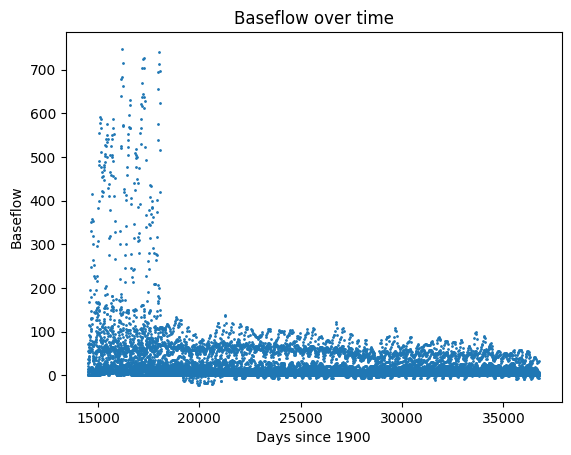

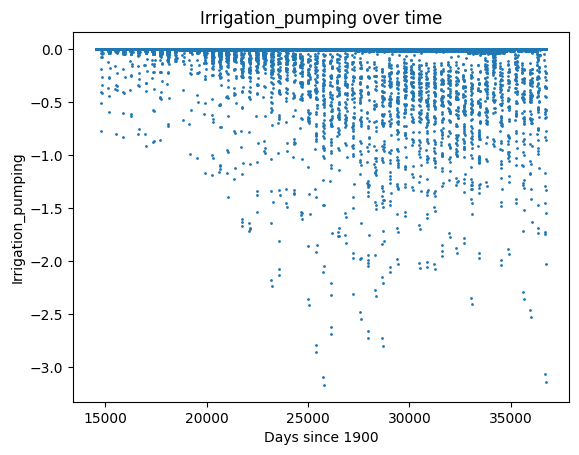

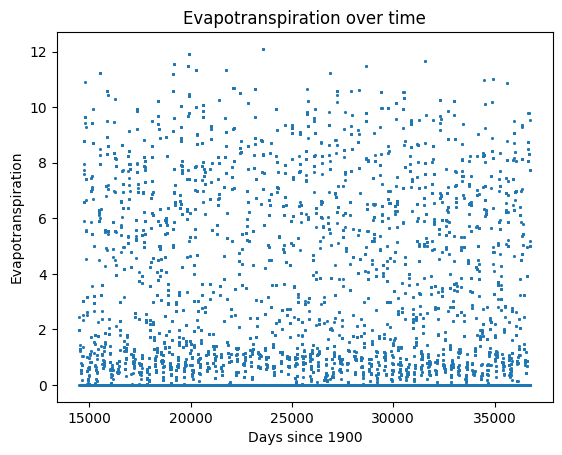

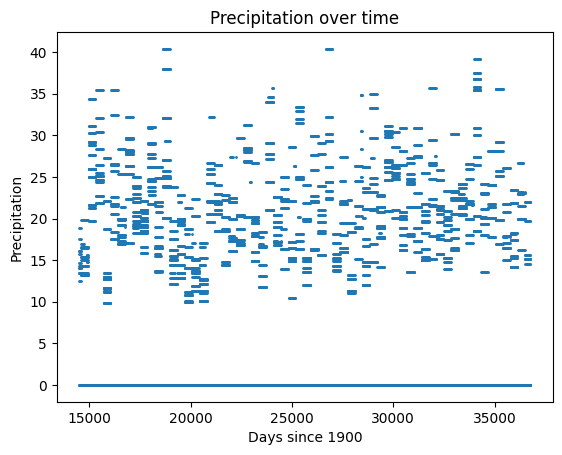

In [11]:
#Scatter plot of the data
import matplotlib.pyplot as plt
#Make dots on scatter plot smaller
plt.scatter(df['days_since_1900'], df['Baseflow'], s=1)
plt.xlabel('Days since 1900')
plt.ylabel('Baseflow')
plt.title('Baseflow over time')
plt.show()

#Scatter plot of irrigation_pumping and date
plt.scatter(df['days_since_1900'], df['Irrigation_pumping'], s=1)
plt.xlabel('Days since 1900')
plt.ylabel('Irrigation_pumping')
plt.title('Irrigation_pumping over time')
plt.show()

#Scatter plot of evapotranspiration and date
plt.scatter(df['days_since_1900'], df['Evapotranspiration'], s=1)
plt.xlabel('Days since 1900')
plt.ylabel('Evapotranspiration')
plt.title('Evapotranspiration over time')
plt.show()

#Scatter plot of precipitation and date
plt.scatter(df['days_since_1900'], df['Precipitation'], s=1)
plt.xlabel('Days since 1900')
plt.ylabel('Precipitation')
plt.title('Precipitation over time')
plt.show()

